#  Whole Lotta Red Lyric Analysis & WordCloud

## Create Tracklist With Lyrics

In [2]:
#Imports
#lyricsgenius provides a simple interface to the song, artist, and lyrics data stored on Genius.com
#Documentation - https://github.com/johnwmillr/LyricsGenius
import lyricsgenius

#To Create Dataframe
import pandas as pd

#Pass Client Access Token to lyricsgenius
#https://genius.com/api-clients
genius = lyricsgenius.Genius(<'ADD YOUR CLIENT ACCESS TOKEN HERE'>,remove_section_headers=True)

#Set album ID here for the album that you want to do a lyrics analysis for
album_id = 456690

#Use album_tracks call
#Takes album_id and returns a dictionary of tracks and relevant info such as genius song id which is needed to get the lyrics for each song
album_info = genius.album_tracks(str(album_id)).get('tracks')

#Count number of tracks on album 
#Create a list 0-N where N represents the total number of songs on album
for tracks in album_info:
    track_count = tracks.get('number')
num_tracks = list(range(track_count))

#Create empty lists to append song data to
track_name = []
genius_song_id = []
lyrics = []

#For each song in album_info append the Song Title and Genius Song ID to list
for n in num_tracks:
    track_name.append(album_info[n]['song']['title'])
    genius_song_id.append(album_info[n]['song']['id']) 
    
#Create dataframe that contains just the Song Title and Genius Song ID
album = pd.DataFrame({'Track Name': track_name, 'Genius Song ID': genius_song_id})

#For each songid in album DF, pass the song id to Genius to get song lyrics for that song
#Append the songid to the empty lyric list
for songid in album['Genius Song ID']:
    lyrics.append(genius.lyrics(songid))
    
#Add song lyrics list to the album data frame
album['Song Lyrics'] = lyrics   

#Show DF
album


,Track Name,Genius Song ID,Song Lyrics
0,Rockstar Made,6303402,"(Wake up, F1lthy)\nFuck you doin'? I told you ..."
1,Go2DaMoon,6204974,Do it...\nWatch it...\nDo it how I...\nWatch i...
2,Stop Breathing,6303400,"(Wake up, F1lthy)\nBreathin' (Blatt, yeah)\nBr..."
3,Beno!,6290606,"(808 Mafia)\n\nSpent a hundred K on my son, I ..."
4,JumpOutTheHouse,6303395,"What? What?\n\nJump out the house, jump out th..."
5,M3tamorphosis,6309513,"Yeah\nShit, oh my god, shit (Yeah, what?)\nShi..."
6,Slay3r,6303391,"Everywhere I go, I get paper (What?)\nEverywhe..."
7,No Sl33p,6303401,"Bah, bah, bah (What?)\nBah, bah, bah (Go, what..."
8,New Tank,6203897,"(Wake up, F1lthy)\n\nYeah, I'm in the coupe wi..."
9,Teen X,6303394,"Pluto\nWe on the X, we on the codeine (Pluto)\..."


## Data Cleansing

In [4]:
#https://stackoverflow.com/questions/59877761/how-to-strip-string-from-punctuation-except-apostrophes-for-nlp?noredirect=1&lq=1

#Import regular expressions 
#For each song's lyrics remove all punctuation (except apostrophe) and make each word lowercase and a column of processed lyrics to the album dataframe
import re
album['Processed Lyrics'] = album['Song Lyrics'].apply(lambda x : re.sub("[^a-zA-Z/']", " ", x).lower())


In [5]:
#https://docs.python.org/3/library/collections.html
#A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values
from collections import Counter

#For all the words, across the album's lyrics, what are the top most 10 common words
c = Counter(" ".join(album['Processed Lyrics']).split())

#Print top 10 most common words on the album
# c.most_common(10)

#Calculate what share of the album is "WHAT" - format as %
"{:.2%}".format(c['what']/sum(Counter(" ".join(album['Processed Lyrics']).split()).values()))

'6.70%'

## Generating a WordCloud

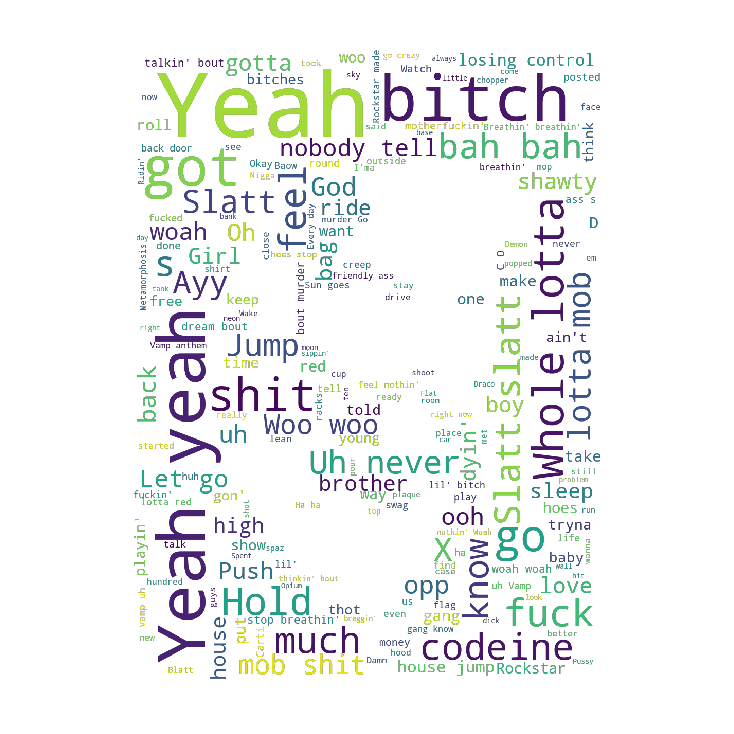

In [331]:
#Library to create word cloud
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#To view plot
import matplotlib.pyplot as plt
#If uising a Jupyter notebook, include
%matplotlib inline

#Create wordcloud around an image
#Make sure it's in the same directory as the code
mask = np.array(Image.open('wlr.jpeg'))

all_words = '' 

#Looping through all incidents and joining them to one text, to extract most common words
for arg in album['Processed Lyrics']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

#Config wordcloud to have transparent backround to overlay on album    
wordcloud = WordCloud(width = 250, height = 250, 
                background_color=None, mode="RGBA", mask=mask, 
                min_font_size = 10).generate(all_words) 

  
#Plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

#Show wordcloud
#plt.show()